Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- less code than matplotlib to make awesome charts
- visualization library

Why need seaborn if we have matplotlib?
- matplotlib was before pandas
- seaborn was made w/ pandas in mind


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data #this helps pull data from a dataset

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

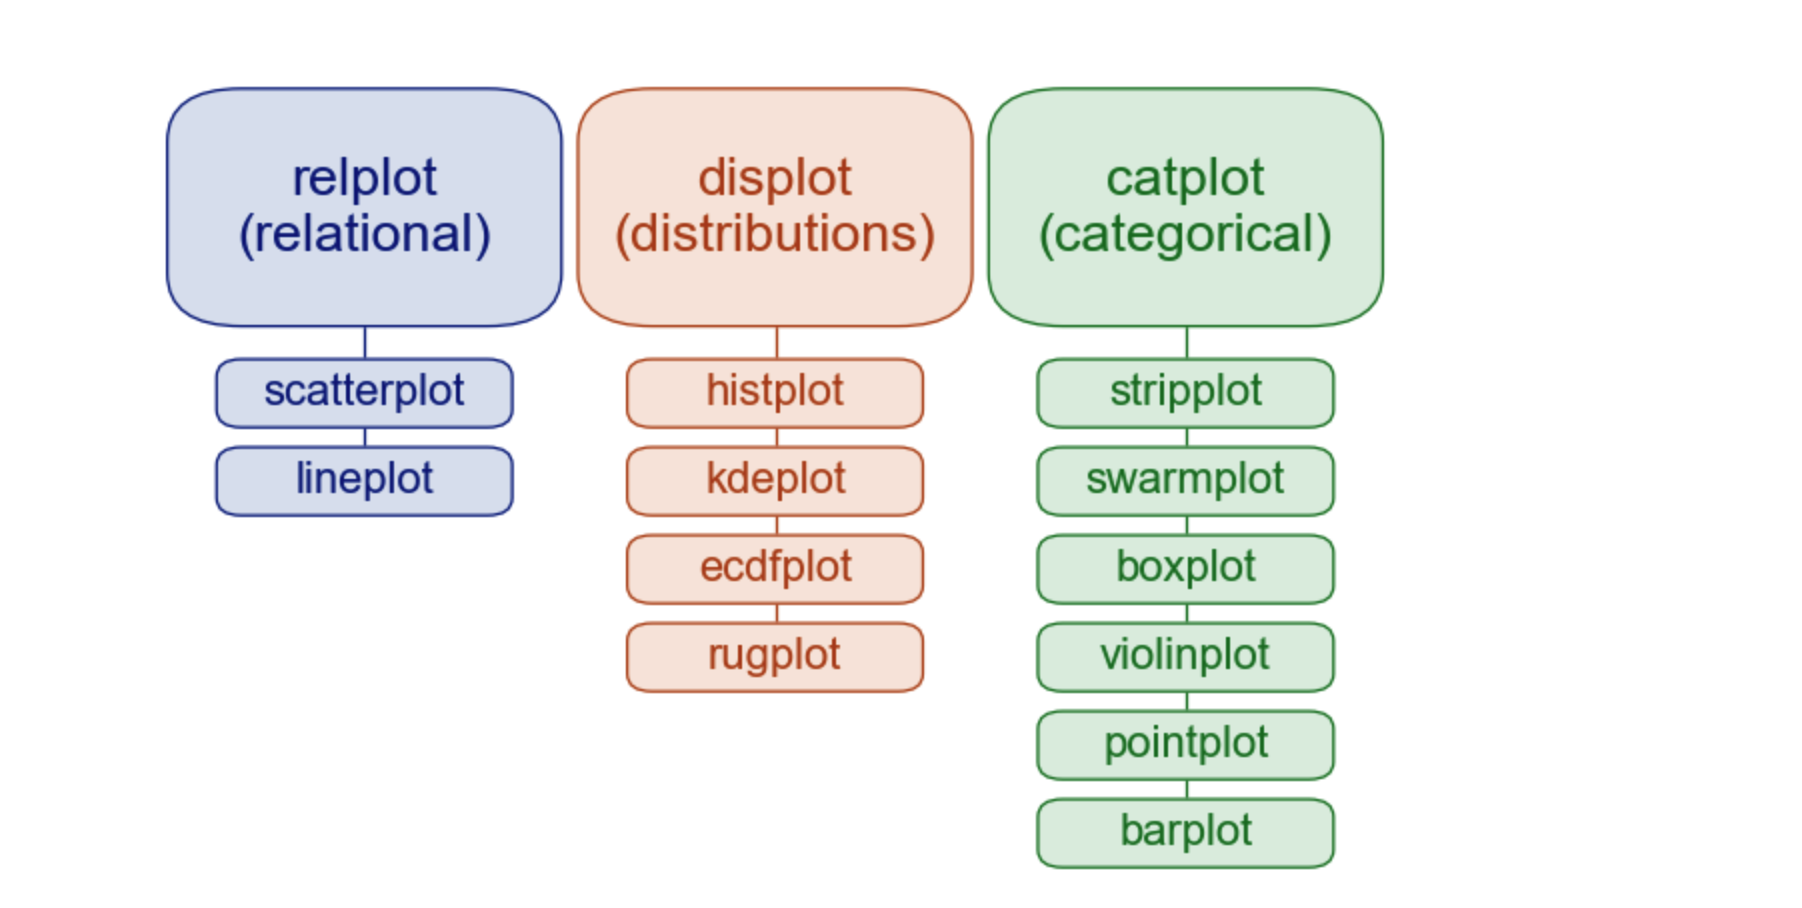

 - source: https://seaborn.pydata.org/tutorial/function_overview.html
 
 
- relplot
    - relational
    - by default: scatter

- displot
    - distributions
    - by default: histogram

- catplot
    - categorical
    - by default: strip plot


- these top 3 (relplot, displot, catplot) put out figure level plots
- the small ones underneath the top 3 put out axes level plots

In [2]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

#in seaborn we have built in datasets

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [4]:
# Option 2: Load using pydataset
tips = data('tips')

In [5]:
data('tips', show_doc = True)
#describes what the dataset is

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution. Examples:
    - Height
    - Weight
    - total_bill and tip (from the dataset we're using above)
    - temperature
- Categorical - Distinct categories. Examples:
    - weekdays
    - Gender (M/F w/ our dataset)
    - 'smoker' (from our dataset)
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories. Examples: 
     - party_size - numeric but discete (from our data)
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots (scatter charts by default)
- `data`: a pandas dataframe that contains the data we want to plot
- `x`: the name of the column that will be the x value
- `y`: the name of the column that will be the y value

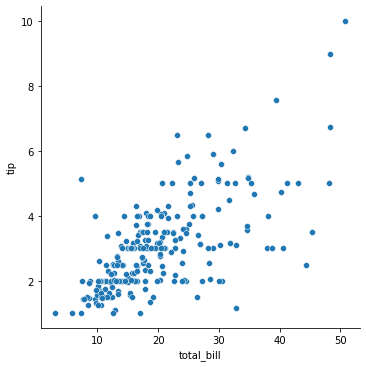

In [8]:
# Explore relationship between total_bill and tip

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

# returns a FacetGrid (which means a figure level object)

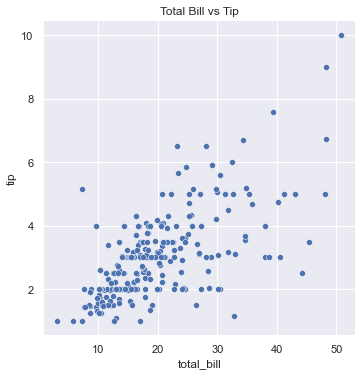

In [13]:
#set styling in seaborn; matplotlib was plt.style.use(). seaborn is:
sns.set()#default seaborn style (instead of matplotlib #plt.style.use())

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

#can customize further
plt.title("Total Bill vs Tip")



#to take off the text at the top:
plt.show()

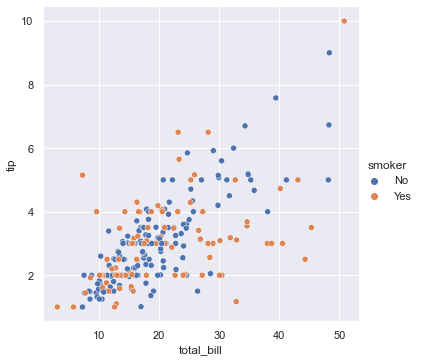

In [14]:
#visualize if distribution is diff for smoker vs nonsmoker w/ hue=data from the col in dataframe
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='smoker')

#basically adding a new dimension to our plot w/ just a single argument

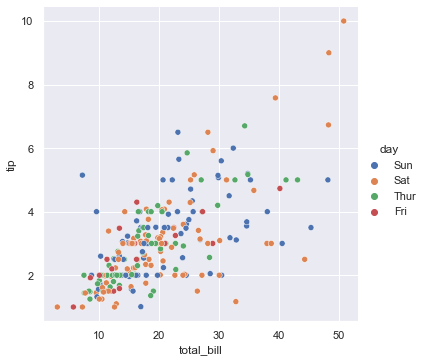

In [15]:
#specify what day

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='day')


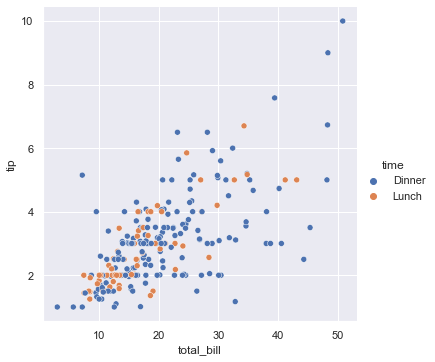

In [68]:
#specify time:
sns.relplot(data=tips, x='total_bill', y='tip', hue='time')

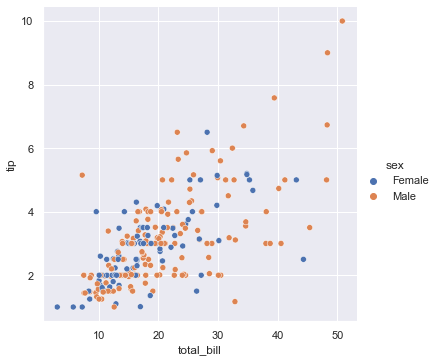

In [16]:
#specify gender(note: write the exact same "col_title" as the column in data)
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='sex')


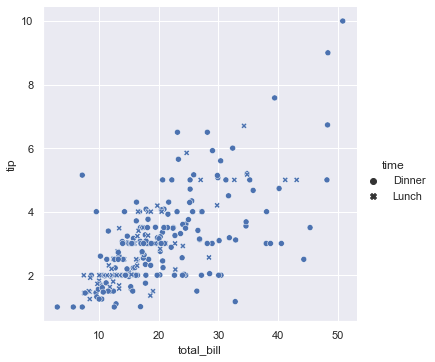

In [17]:
#style as a keyword argument (kwarg)
sns.relplot(data = tips, x = 'total_bill', y = 'tip', style='time')


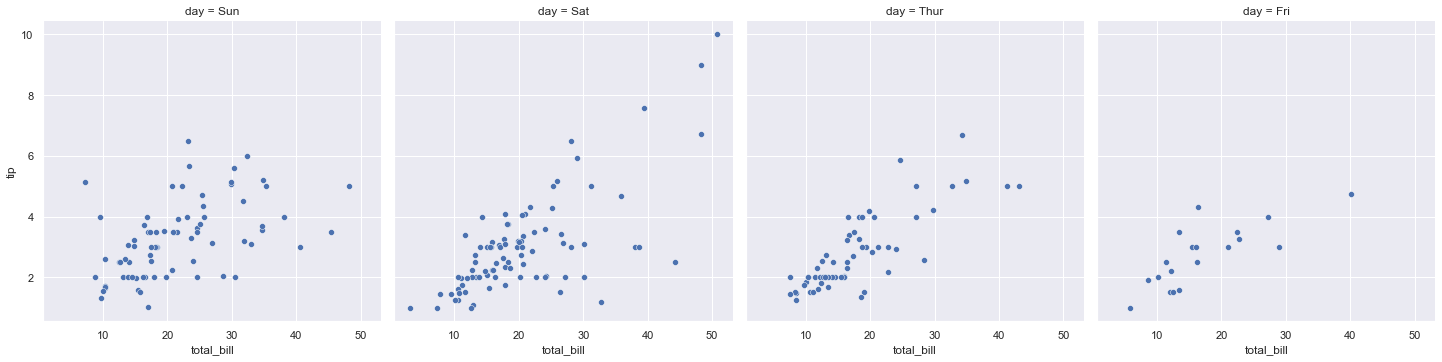

In [18]:
#use arg col
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'day')

#returns 4 subplots broken by what day of the week it is
#can return subplots since its a fig level object

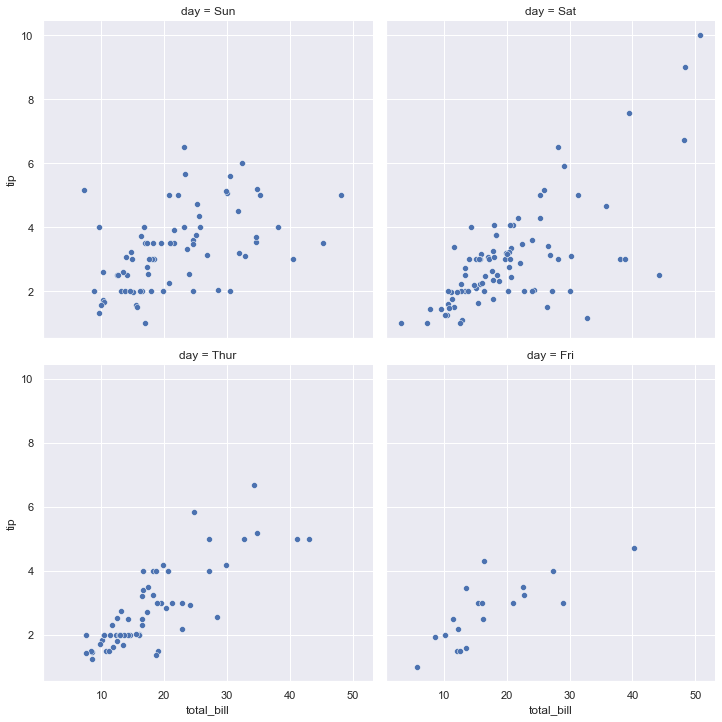

In [19]:
#display data in 2 columns instead of 4
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', col_wrap=2)

#col_wrap specifies # of cols


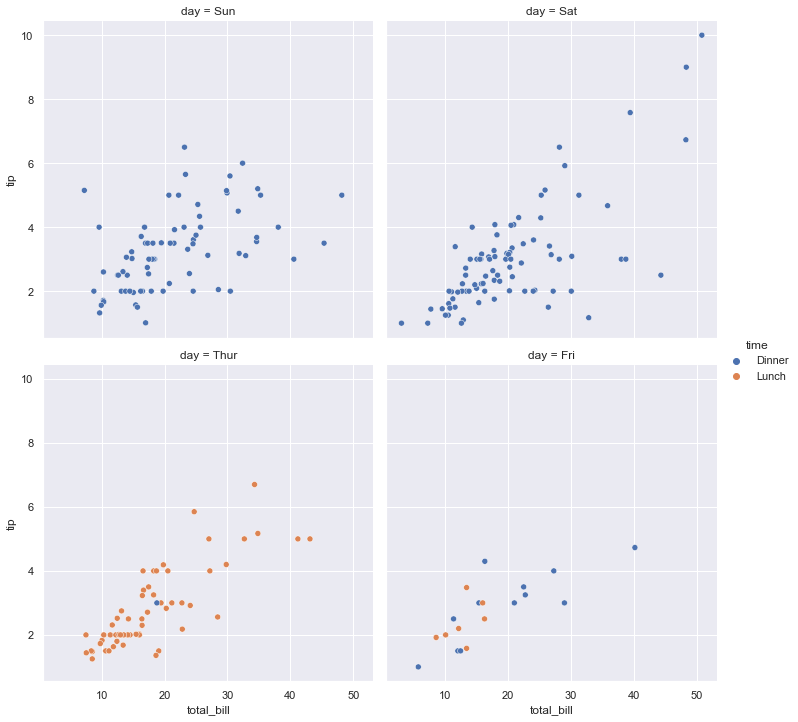

In [21]:
#can still add on hue

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='time', col = 'day', col_wrap=2)


#### Key takeaways?

- Tip amount generally increases with total_bill
- Server works in evenings on Sun and Sat
- Server works during lunchtime on Thurs
- Server has more flexibility of working times on Fri

#### Ways to add DF columns to the chart
- hue (add diff colors on same chart)
- col - creates subplots
- style (for the categories)


#### Regression plots

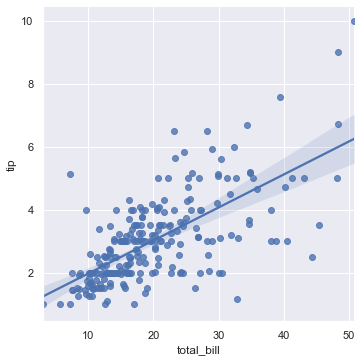

In [22]:
# Add Regression line to relplot

sns.lmplot(x='total_bill', y='tip', data=tips)

#translucent band is 95% confidence interval (CI) by default
#you can change CI by specifiying *CI=0 or *CI=99

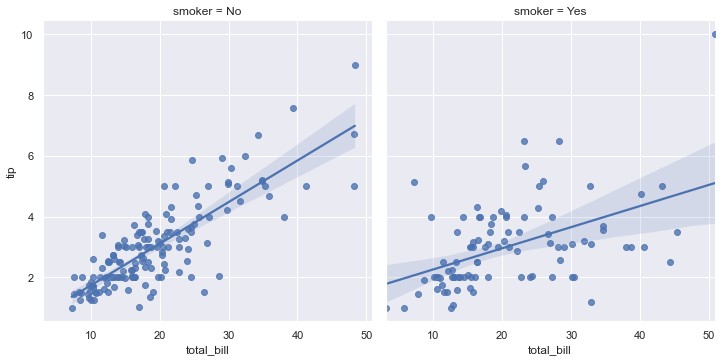

In [70]:
#show 2 plots for the 2 columns: smoker vs nonsmoker
sns.lmplot(x='total_bill', y='tip', col='smoker', data=tips)


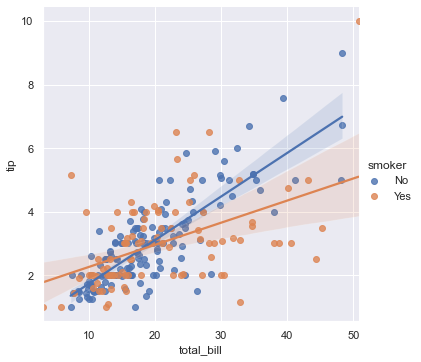

In [24]:
#gives 2 regression lines
sns.lmplot(x='total_bill', y='tip',hue='smoker', data=tips)

#the transulcent shows ci=95% by default

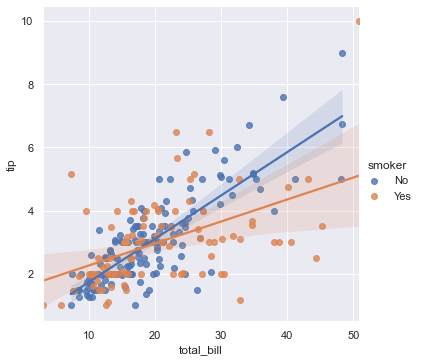

In [72]:
#specify ci to above
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, ci = 99)


### Distributions

In [ ]:
# displot/histplot/kdeplot

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

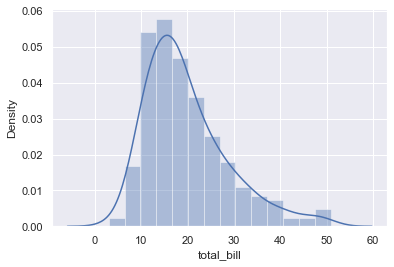

In [25]:
#warning shows (sns.distplot (has a 't')) will be removed in a future version
sns.distplot(tips.total_bill)

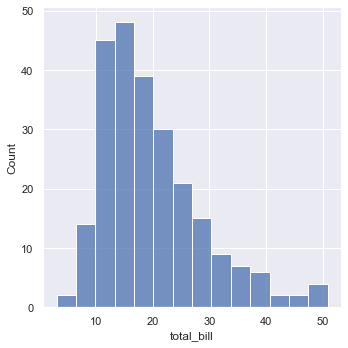

In [26]:
#updated version but kde is missing by default, 
#so you can add/specify kde (next cell)

sns.displot(tips.total_bill)

#sns.displot (w/out the 't')

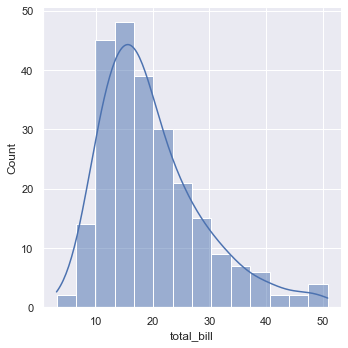

In [27]:
#added kde
#kde is Kernel Density Estimation: 
#a way to estimate the probability density func of a continuous random variable

sns.displot(tips.total_bill, kde=True)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

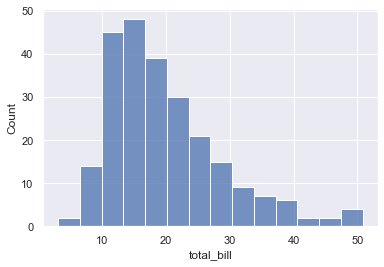

In [28]:
sns.histplot(tips.total_bill)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

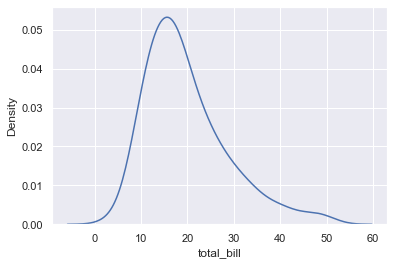

In [29]:
#to only show kde
sns.kdeplot(tips.total_bill)

### Categorial Plots

#### Boxplots (sometimes called box and whisker plot)


<AxesSubplot:ylabel='tip'>

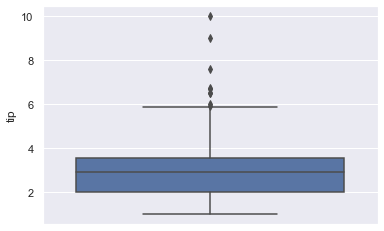

In [30]:
sns.boxplot(data=tips, y='tip')

<AxesSubplot:xlabel='tip'>

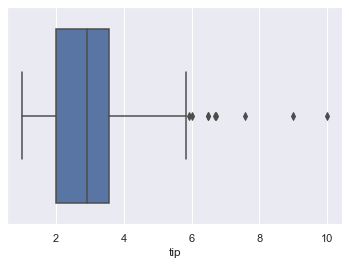

In [31]:
#to view it horizontally, change it to x ='tip' instead of y=
sns.boxplot(data=tips, x='tip')

### Boxplot explained: 

- **Minimum** 
    - smallest # in the data set
    - shown at the far left of the chart
    - Q1 - 1.5 * IQR

- **First Quartile (Q1)**
    - lower quartile or 25th percentile
    - 25% that falls below the lower quartile
    - middle number btwn the smallest number (not the minimum) & the median of the dataset
    - far left of the box 

- **Median**
    - middle point/middle value of the dataset
    - shown as a line in the center of the box
    - shown by the line that divides the box into two parts
    - Q2 or 50th percentile
    
- **Inter-Quartile Range (IQR)** 
    - The BOX that shows:
        - q1 (left edge of box)
        - median (middle line)
        - q3 (right edge of box)
    - the middle box that represents the middle 50% of scores for the group
    - the range of scores from lower to upper quartile (Q3-Q1)
    - 25th to the 75th percentile

- **Third Quartile (Q3)**
    - upper quartile or 75th percentile
    - 75% that falls below the upper quartile
    - middle value btwn the median & the highest value (not the maximum) of the dataset
    - shown at the far right of the box

- **Maximum**
    - largest # in the data set
    - shown at the far right of the chart
    - Q3 + 1.5 * IQR
    
- **Whiskers**
    - the upper and lower whiskers represent scores outside the middle 50%.
    - whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups

- **Outliers**
    - anything outside of whiskers
    - “maximum”: Q3 + 1.5*IQR
    - “minimum”: Q1 -1.5*IQR

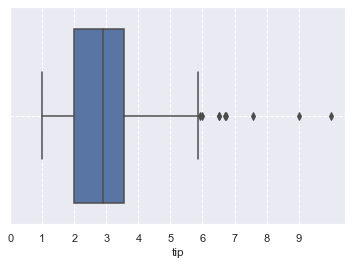

In [34]:
sns.boxplot(data=tips, x='tip')
plt.grid(True, ls='--')
plt.xticks(np.arange(0,10,1));

In [35]:
#gives you the actual values and matches the plot we are getting
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:>

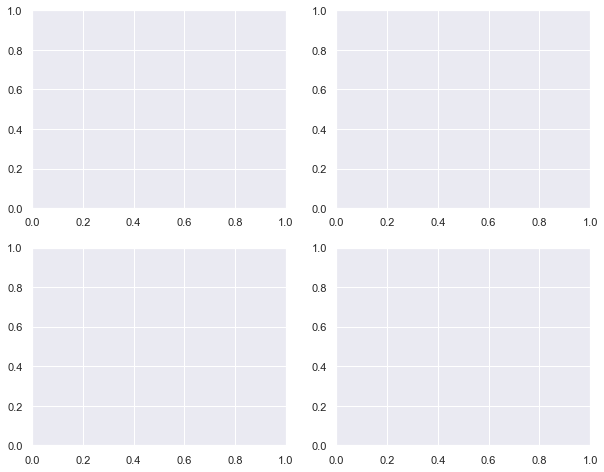

In [74]:
#can still use matplotlib combined w/ seaborn
plt.figure(figsize=(10,8))

#create subplots
plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.subplot(224)


<AxesSubplot:>

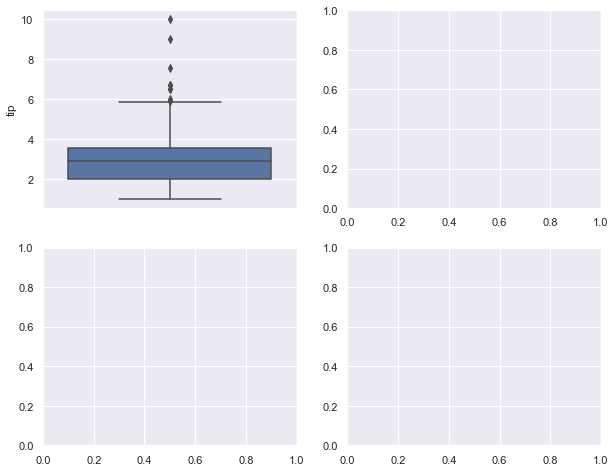

In [73]:
#1st subplot
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
plt.subplot(223)
plt.subplot(224)

<AxesSubplot:>

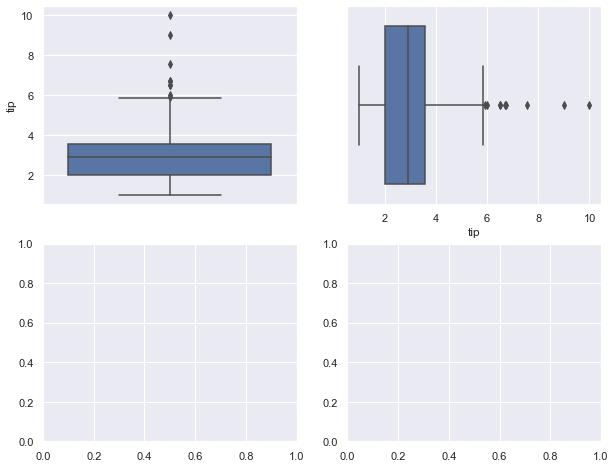

In [38]:
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
plt.subplot(224)

<AxesSubplot:>

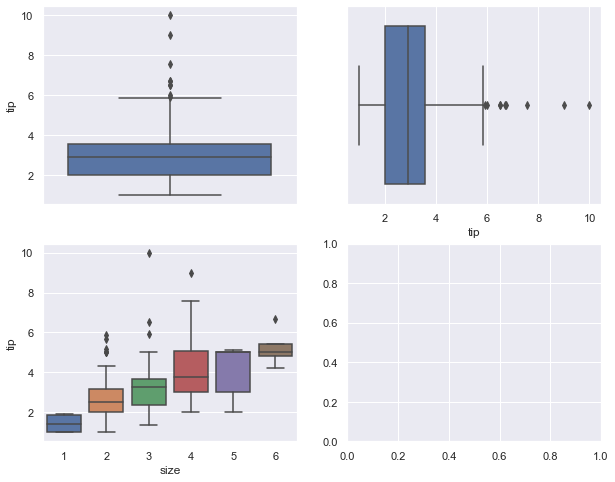

In [40]:
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
sns.boxplot(y='tip', x='size', data=tips) 
#breaks it down by party 'size'

plt.subplot(224)

<AxesSubplot:xlabel='tip', ylabel='time'>

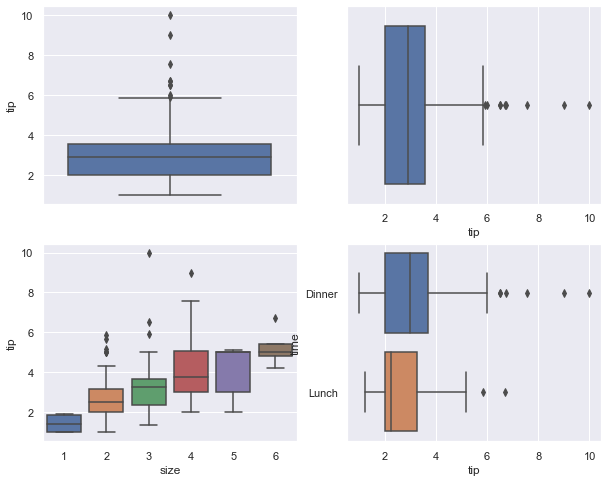

In [41]:
plt.figure(figsize=(10,8))

#create subplots
plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
sns.boxplot(y='tip', x='size', data=tips) 

plt.subplot(224)
sns.boxplot(x='tip', data=tips, y='time')
#distribution broken down by 'time'(dinner or lunch)

<AxesSubplot:xlabel='tip', ylabel='time'>

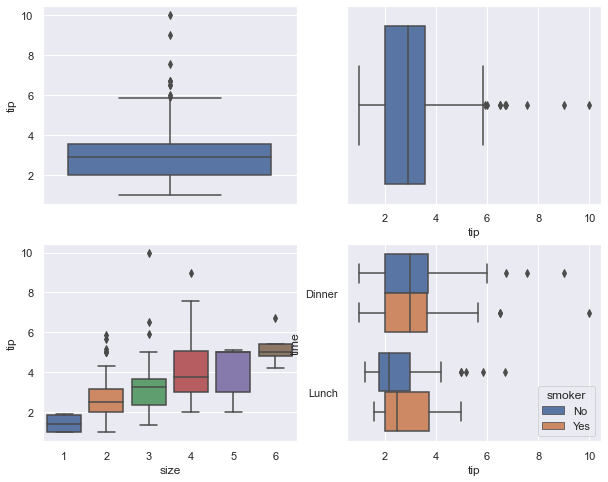

In [42]:
plt.figure(figsize=(10,8))

#create subplots
plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
sns.boxplot(y='tip', x='size', data=tips) 

plt.subplot(224)
sns.boxplot(x='tip', data=tips, y='time', hue='smoker')
#can break it down even further w/ hue specifying 'smoker' yes/no

<AxesSubplot:xlabel='tip', ylabel='time'>

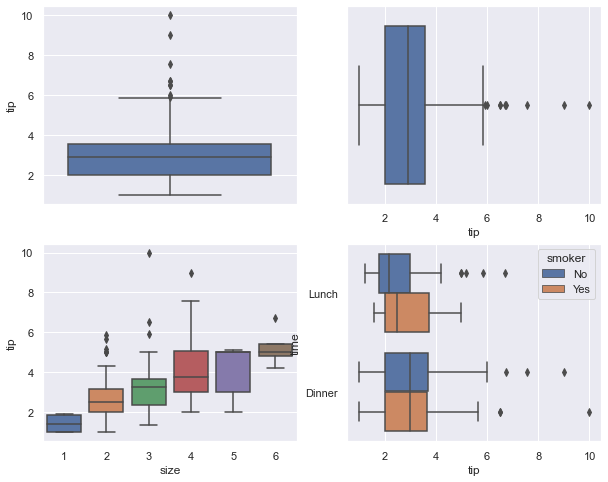

In [43]:
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
sns.boxplot(y='tip', x='size', data=tips) 

plt.subplot(224)
sns.boxplot(x='tip', data=tips, y='time', hue='smoker', 
            order=['Lunch', 'Dinner'])
#changes the order it was presented from above

<AxesSubplot:xlabel='tip', ylabel='time'>

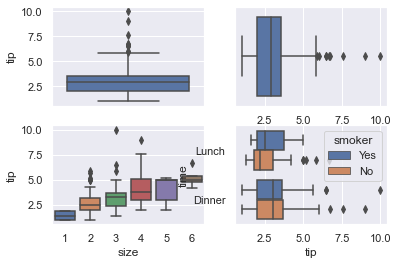

In [45]:
plt.subplot(221)
sns.boxplot(y='tip', data=tips)

plt.subplot(222)
sns.boxplot(x='tip', data=tips)

plt.subplot(223)
sns.boxplot(y='tip', x='size', data=tips) 

plt.subplot(224)
sns.boxplot(x='tip', data=tips, y='time', hue='smoker', 
            order=['Lunch', 'Dinner'],
            hue_order=['Yes', 'No']) #changes hue order from above

#### Heatmap (can be used to visualize tabular data)
- tabular data is data that is structured into rows, each of which contains info about some thing

In [50]:
data=pd.crosstab(tips.time, tips['size'])
                        #size is a reserved word so we have to use brackets and ''
data

size,1,2,3,4,5,6
time,,,,,,
Dinner,2,104,33,32,4,1
Lunch,2,52,5,5,1,3


<AxesSubplot:xlabel='size', ylabel='time'>

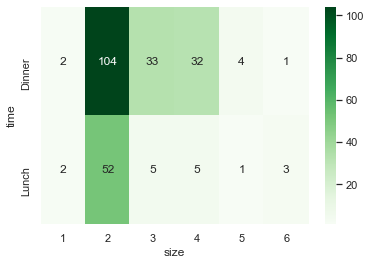

In [52]:
sns.heatmap(data, cmap=plt.cm.Greens, annot=True, fmt='d') #fmt can = 'f' as well
#specify color w/ cmap               #annot shows nums

#cmap = color map

In [54]:
data = pd.crosstab(tips.time, tips.smoker)
data

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

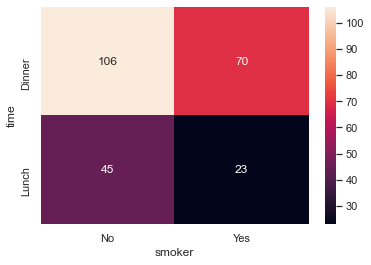

In [55]:
sns.heatmap(data, annot=True, fmt = 'd')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'tip')

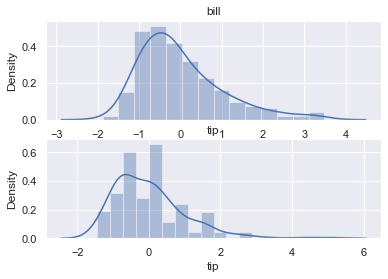

In [92]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(tips.total_bill),
                   'tip': scale(tips.tip)})

plt.subplot(211)
sns.distplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.distplot(df.tip)
plt.title('tip')

#### Pairplot (gives you broad view of an entire data set)
- it will visualize the relationship btwn every quantitative feature in a dataset

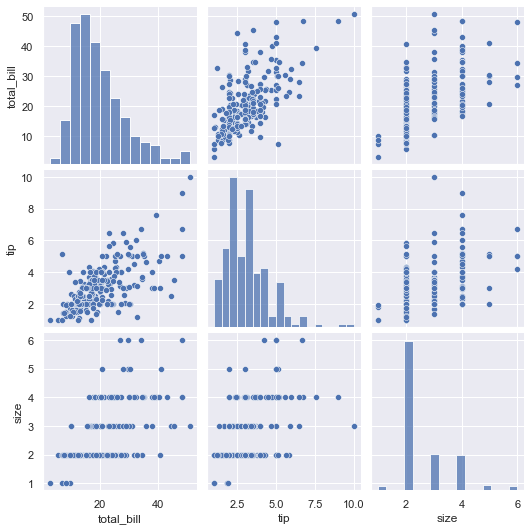

In [56]:
sns.pairplot(tips) #useful to see relational values
#has duplicates but rotated

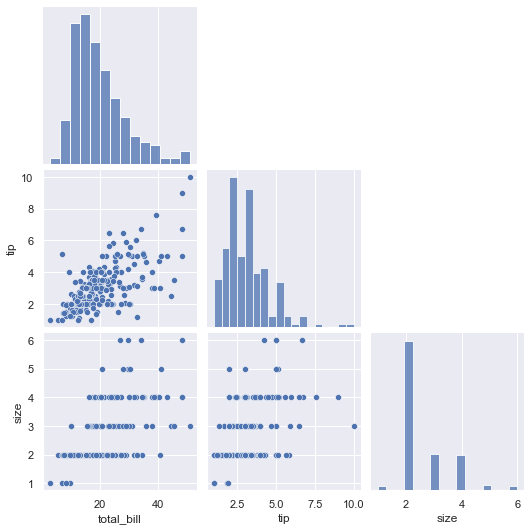

In [83]:
sns.pairplot(tips, corner=True)
#takes off duplicates

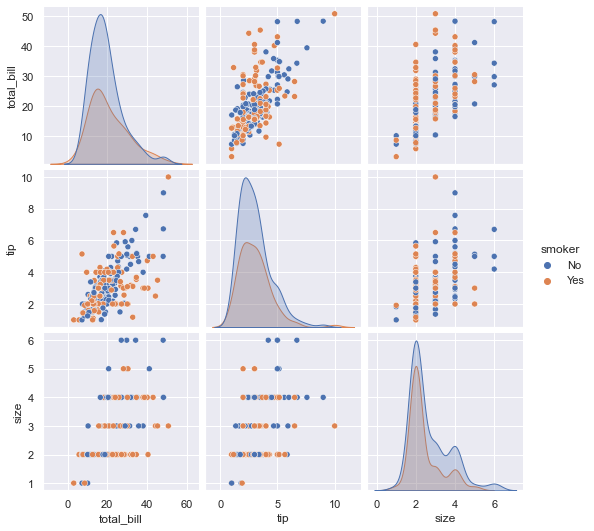

In [57]:
#broken down w/ smoker vs nonsmoker using *hue=
sns.pairplot(tips, hue='smoker')

#### Jointpplot (combines 2 visualizations)

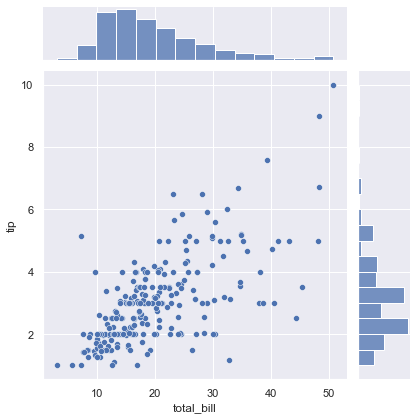

In [58]:
sns.jointplot(data=tips, x='total_bill', y='tip')

#gives scatter plot along w/ distribution 

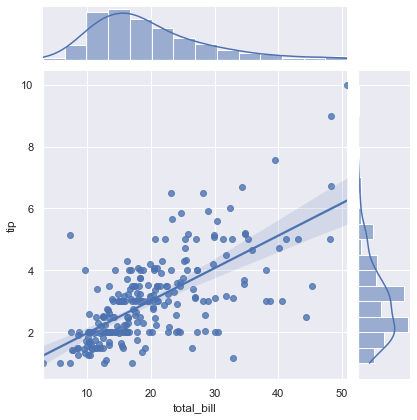

In [59]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

#look at regression line and kde line for histograms

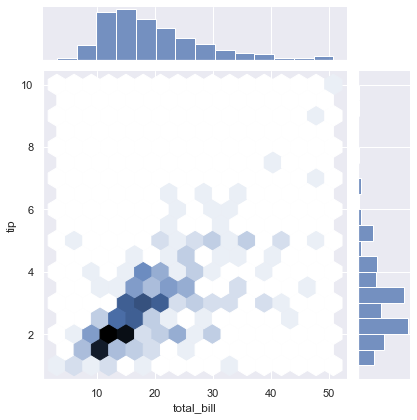

In [60]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='hex') #can change kind


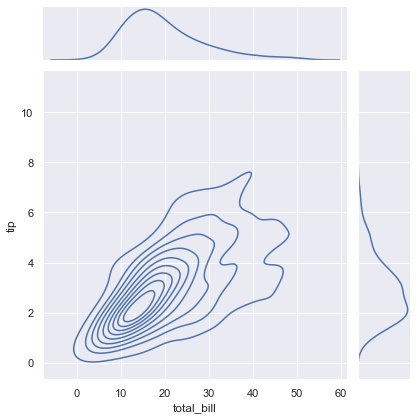

In [61]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='kde')


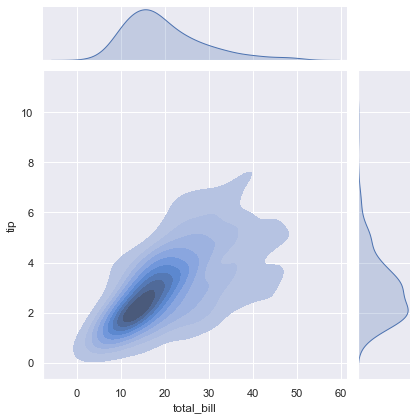

In [62]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='kde', fill=True)


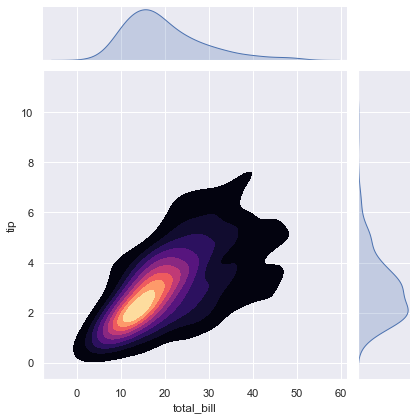

In [64]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='kde', cmap = 'magma', fill=True)
#cmap = color map

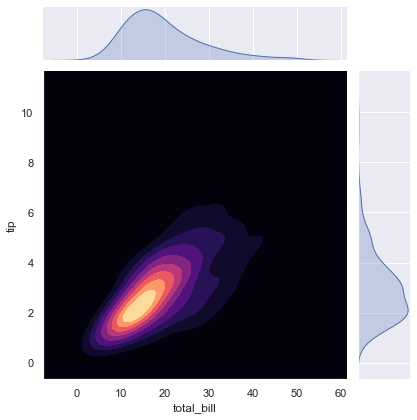

In [65]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='kde', cmap = 'magma', fill=True, thresh=0)
#thresh makes it all dark

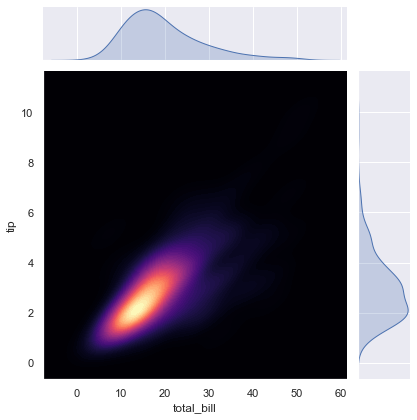

In [88]:
sns.jointplot(data=tips, x='total_bill', y='tip', 
              kind='kde', cmap = 'magma', fill=True, thresh=0, 
              levels=60)
